In [1]:
# Step 1: Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [2]:
# Step 2: Load the Dataset from CSV
df = pd.read_csv('../content/dataset1.csv')

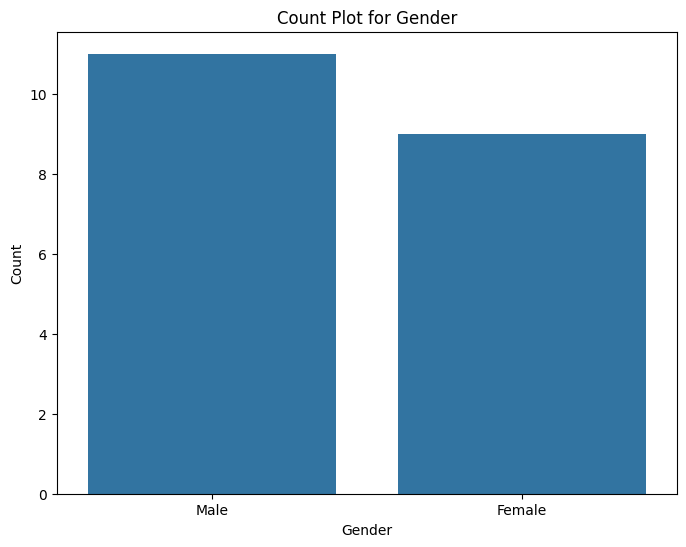

In [3]:
# Step 3: Create Visualizations

# 1. Count Plot for Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Count Plot for Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

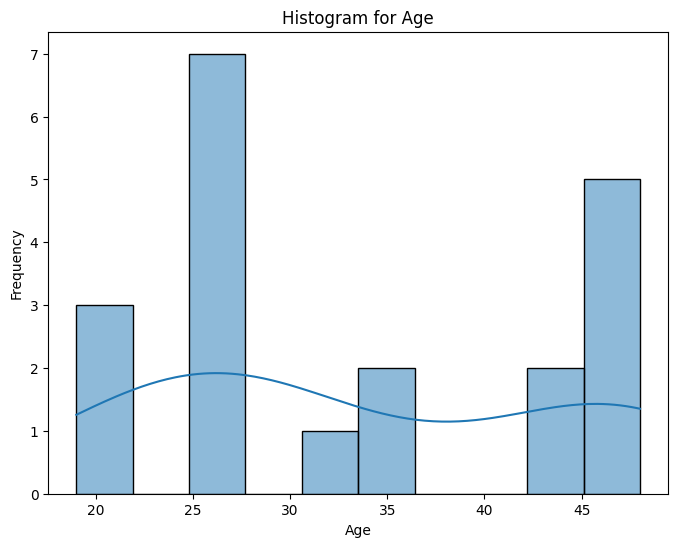

In [4]:
# 2. Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=10, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

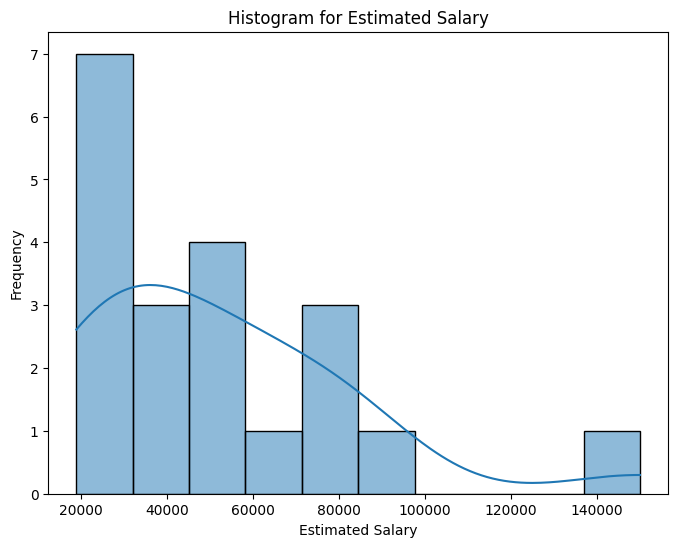

In [5]:
# 3. Histogram for Estimated Salary
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='EstimatedSalary', bins=10, kde=True)
plt.title('Histogram for Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Step 4: Preprocess the Data (Encode Gender, Standardize features)
# Encode 'Gender' column to numerical values
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [7]:
# Split the features and target variable
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

In [8]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
# Step 5: Split the Dataset into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Step 6: Implement KNN Algorithm
k = 3  # You can choose any k value. Here, we are using 3.
knn = KNeighborsClassifier(n_neighbors=k)

In [11]:
# Step 7: Train the Model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
# Step 8: Make Predictions
y_pred = knn.predict(X_test)

In [13]:
# Step 9: Evaluate the Model
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

KNN Accuracy: 0.75
KNN Confusion Matrix:
[[1 1]
 [0 2]]


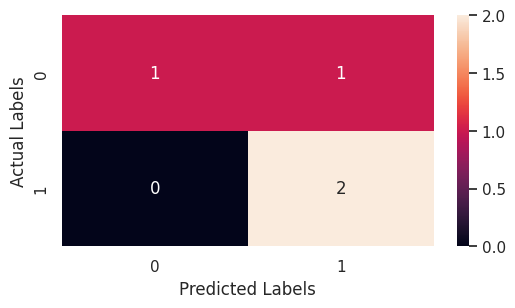

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [14]:
# Print the evaluation results
print(f'KNN Accuracy: {accuracy}')
print(f'KNN Confusion Matrix:\n{conf_matrix}')
sns.set(rc={'figure.figsize':(6,3)})
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
print(f'KNN Classification Report:\n{classification_report_str}')

In [15]:
# Step 10: Predict for a new data point (e.g., Female, Age 30, EstimatedSalary 87000)
new_data = [[label_encoder.transform(['Female'])[0], 30, 87000]]
new_data = scaler.transform(new_data)
purchase_pred = knn.predict(new_data)
print(f'Prediction for new data point [Female, 30, 87000]: {"Purchased" if purchase_pred[0] == 1 else "Not Purchased"}')

Prediction for new data point [Female, 30, 87000]: Not Purchased


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [16]:
# Step 11: Cross-Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn, X, y, cv=cv)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Cross-Validation Mean Score: {cv_scores.mean()}')

Cross-Validation Scores: [1.  1.  0.5 1.  0.5 1.  1.  0.5 1.  1. ]
Cross-Validation Mean Score: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


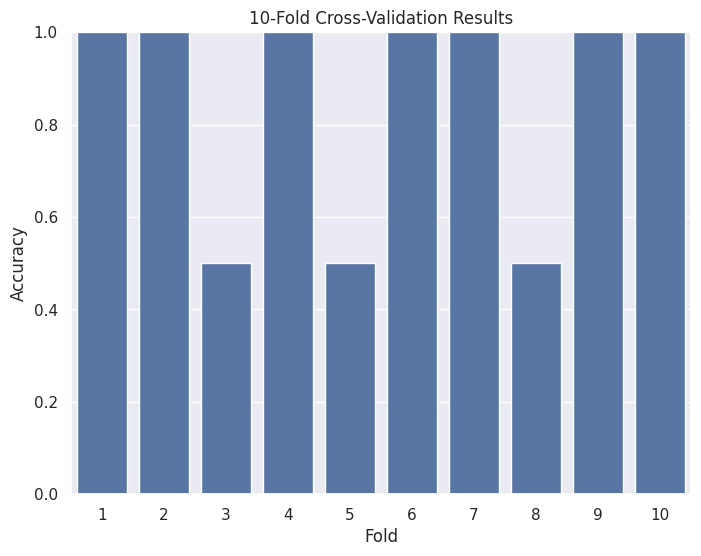

In [17]:
# Cross-Validation Result Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=list(range(1, 11)), y=cv_scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('10-Fold Cross-Validation Results')
plt.ylim(0, 1)
plt.show()

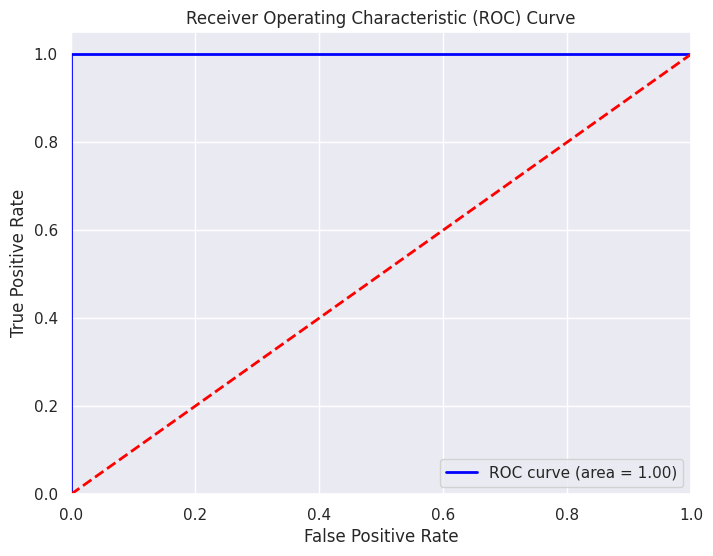

In [18]:
# Step 12: ROC Curve
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()